In [1]:

using QuadGK

In [2]:

integrand(x, n) = x^n * exp(-x)

integrand (generic function with 1 method)

In [3]:

n = 20
quadgk_count(x->integrand(x,n), 0, 1)

(0.018350467697256213, 9.375208015196608e-11, 45)

In [4]:

np = 22
res1 = zeros(np)
res2 = zeros(np);

In [5]:

t_quadgk = @elapsed for n = 1:np
    res1[n] = quadgk(x -> integrand(x, n), 0.0, 1.0)[1]
end

0.231847546

In [6]:

# run this cell twice to exclude the compilation time
res2[1] = 1.0 - 2*exp(-1.0)
t_recur = @elapsed for n = 2:np
    res2[n] = n * res2[n-1] - exp(-1.0)
end

0.004526561

In [7]:

t_quadgk / t_recur

51.21935747690134

In [8]:

using PyPlot

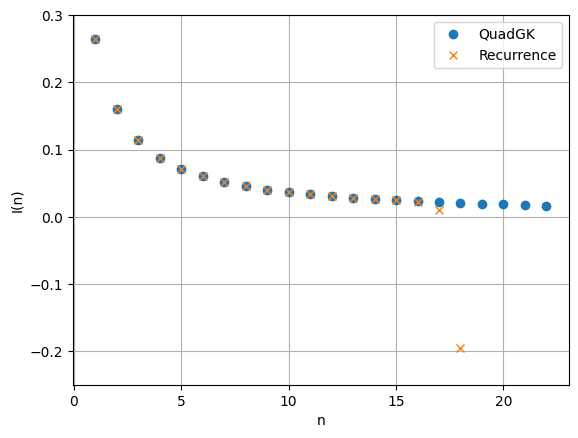

In [9]:

plot(1:np, res1, marker="o", linestyle="none", label="QuadGK")
plot(1:np, res2, marker="x", linestyle="none", label="Recurrence")
ylim(-0.25, 0.3)
legend()
grid(true)
xlabel("n")
ylabel("I(n)");

In [10]:

function myfactorial(n)
    f = 1.0
    for i = 1:n
        f *= i
    end
    return f
end

myfactorial (generic function with 1 method)

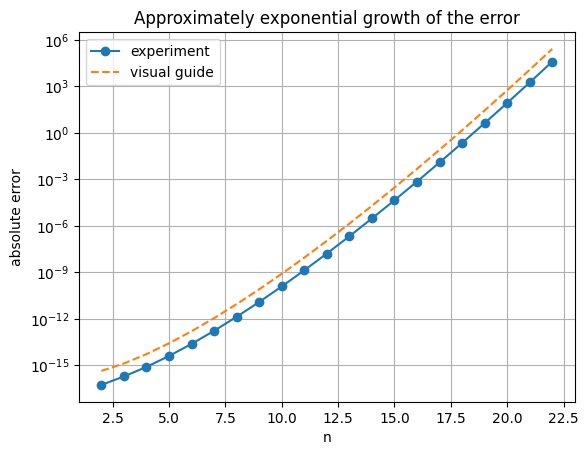

In [11]:

semilogy(2:np, (abs.(res1 .- res2))[2:np], marker="o", label="experiment")
semilogy(2:np, eps() * myfactorial.(2:np), linestyle="dashed", label="visual guide")
grid(true)
legend()
xlabel("n")
ylabel("absolute error")
title("Approximately exponential growth of the error");

In [12]:

forward(f, x, h) = (f(x + h) - f(x)) / h
central2(f, x, h) = (f(x + h) - f(x - h)) / (2 * h)
central4(f, x, h) = (-f(x + 2 * h) + 8 * f(x + h) - 8 * f(x - h) + f(x - 2 * h)) / (12 * h);

In [13]:

f(x) = exp(x) + sin(x)
fp(x) = exp(x) + cos(x);

In [14]:

np = 53
dx = 2.0 .^ ((-np):0)
err_f = similar(dx)
err_c2 = similar(dx)
err_c4 = similar(dx);

In [15]:


x0 = 1.0
exact_fpx0 = fp(x0) # exact value of the derivative at x0

for i in 1:(np + 1)
    err_f[i] = abs(forward(f, x0, dx[i]) - exact_fpx0)
    err_c2[i] = abs(central2(f, x0, dx[i]) - exact_fpx0)
    err_c4[i] = abs(central4(f, x0, dx[i]) - exact_fpx0)
end

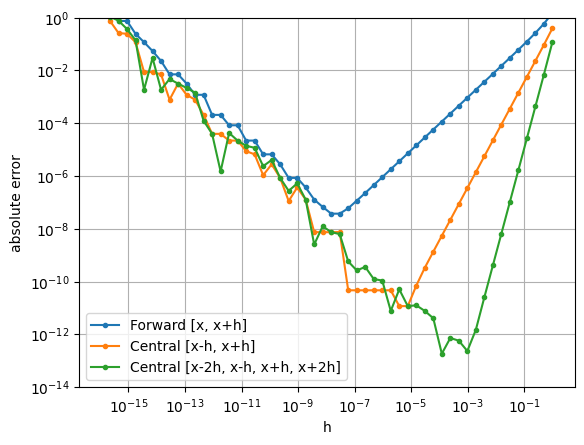

In [16]:

loglog(dx, err_f; marker=".", label="Forward [x, x+h]")
loglog(dx, err_c2; marker=".", label="Central [x-h, x+h]")
loglog(dx, err_c4; marker=".", label="Central [x-2h, x-h, x+h, x+2h]")
legend()
grid(true)
xlabel("h")
ylabel("absolute error")
ylim(1e-14, 1.0);

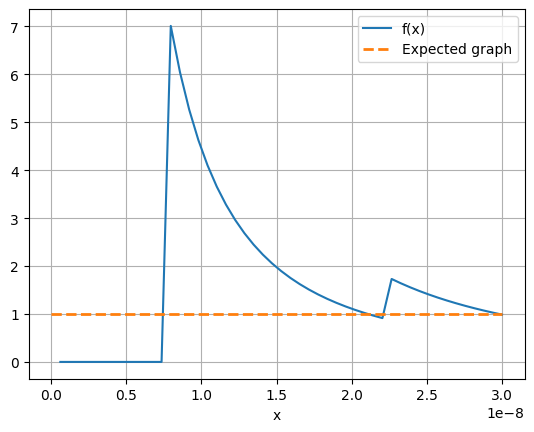

In [17]:

f(x) = 2*(1/sqrt(1-x^2) - 1)/x^2
x = range(0.0, 3e-8, 50)
plot(x, f.(x), label="f(x)")
plot(x, 1 .+ 3/4*x .^2, label="Expected graph", linestyle="dashed", linewidth=2)
legend()
grid(true)
xlabel("x");

In [18]:

10^20

7766279631452241920